# Data Analysis with Python

The data used here (automobile) can be downloaded at [https://archive.ics.uci.edu/dataset/10/automobile](https://archive.ics.uci.edu/dataset/10/automobile) or better at [https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)

|Variable Name     |	Role    |Type         |	Description                                  |	Units |	Missing Values|
|:-----------------|:----------|:-------------|:---------------------------------------------|:-------|:--------------|
|price	           |Feature    | Continuous   |continuous from 5118 to 45400                 |        | yes           |
|highway-mpg	   |Feature	   | Continuous   |continuous from 16 to 54		                 |        |no             |
|city-mpg	       |Feature	   | Continuous   |continuous from 13 to 49	                	 |        |no             |
|peak-rpm	       |Feature    |Continuous	  |continuous from 4150 to 6600                  |        |yes            |
|horsepower	       |Feature	   |Continuous	  |continuous from 48 to 288                     |		  |yes            |
|compression-ratio |Feature	   |Continuous	  |continuous from 7 to 23	                     |	      |no             |
|stroke	           |Feature	   |Continuous	  |continuous from 2.07 to 4.17             	 |	      |yes            |
|bore	           |Feature	   |Continuous	  |continuous from 2.54 to 3.94	                 | 	      |yes            |
|fuel-system	   |Feature	   |Categorical	  |1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi  |	      |no             |
|engine-size	   |Feature	   |Continuous	  |continuous from 61 to 326                     |		  |no             |
|num-of-cylinders  |Feature	   |Integer	      |eight, five, four, six, three, twelve, two	 |        |no             |
|engine-type   	   |Feature	   |Categorical	  |dohc, dohcv, l, ohc, ohcf, ohcv, rotor		 |        |no             |
|curb-weight	   |Feature	   |Continuous	  |continuous from 1488 to 4066		             |        |no             |
|height	           |Feature	   |Continuous	  |continuous from 47.8 to 59.8		             |        |no             |
|width	           |Feature	   |Continuous	  |continuous from 60.3 to 72.3		             |        |no             |
|length	           |Feature	   |Continuous	  |continuous from 141.1 to 208.1		         |        |no             |
|wheel-base	       |Feature	   |Continuous	  |continuous from 86.6 120.9		             |        |no             |
|engine-location   |Feature	   |Binary	      |front, rear		                             |        |no             |
|drive-wheels	   |Feature	   |Categorical	  |4wd, fwd, rwd		                         |        |no             |
|body-style	       |Feature	   |Categorical	  |hardtop, wagon, sedan, hatchback, convertible | 		  |no             |


## Python Libraries fro Data Science
Python libs for DS can be divided into three groups:

|Group                   |Examples                                            |
|:-----------------------|:---------------------------------------------------|
|Scientific computing    |Pandas; Numpy; SciPy                                |
| Visualization          |Matplotlib; Seaborn                                 |
|Algorithmic             |Scikit-Learn; Statsmodels                           |

## Importing and Exporting Data in Python
To import the CSV file, we'll use Pandas

### Importation

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats.stats as stats
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(url, header = None, na_values = "?")

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


Headers can be added manually as follows

In [4]:
header_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base",
          "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio",
          "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

df.columns = header_names

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Exportation

In [5]:
df.to_csv("autos.csv")

### Other file formats

To import other file formats, seet the table below:

| Data Format  | Read                 | Save             |
|:-------------|:---------------------|:-----------------|
|CSV           |`pd.read_csv() `      |`df.to_csv()`     |
|json          |`pd.read_json() `     |`df.to_json()`    |
|Excel         |`pd.read_excel()`     |`df.to_excel()`   |
|SQL           |`pd.read_sql()`       |`df.to_sql()`     |

## Getting Started Analyzing Data in Python
### Data type checking
The data type method (`dtypes`) is applied for this purpose.

From the checking below, the vairiable *bore* is not supposed to be an *object* type.

In [6]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Getting the statistical summary
To have statistical summaries, the method `describe` can be used.

In [7]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Adding the argument `include = "all"` would also include qualitative variables in from the describe method.

NaN in the output means **Not a Number**

In [8]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205,205,205,203,205,205,205,205.000000,...,205.000000,205,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
unique,NaN,NaN,22,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,185,168,114,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.834146,122.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,1.245307,35.442168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,-2.000000,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000


Another way of having summary of a dataframe is the `df.info()` method:

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Accessing Databases with Python 

A user can access a DBMS from Jupyter Notebook using API (Application Programming Interface) calls

The use of Python DB API is illustrated below:

In [10]:
# from dmodule import connect

## Create connection object
# connection = connect('databasename', 'username', 'pwd')

## Create a cursor object
# cursor = connection.cursor()

## Run queries
# cursor.execute('select * from mytable')
# result = cursor.fetchall()

## It's time to free ressources
# cursor.close()
# connection.close()

## Lesson Summary
At this point in the course, we know: 

* Each line in a dataset is a row, and commas separate the values.
* To understand the data, you must analyze the attributes for each column of data.
* Python libraries are collections of functions and methods that facilitate various functionalities without writing code from scratch and are categorized into Scientific Computing, Data Visualization, and Machine Learning Algorithms.
* Many data science libraries are interconnected; for instance, Scikit-learn is built on top of NumPy, SciPy, and Matplotlib.
* The data format and the file path are two key factors for reading data with Pandas.
* The `read_CSV` method in Pandas can read files in CSV format into a Pandas DataFrame.
* Pandas has unique data types like **object**, **float**, **Int**, and **datetime**.
* Use the `dtype` method to check each column’s data type; misclassified data types might need manual correction.
* Knowing the correct data types helps apply appropriate Python functions to specific columns.
* Using Statistical Summary with `describe()` provides **count**, **mean**, **standard deviation**, **min**, **max**, and **quartile ranges** for numerical columns.
* You can also use `include='all'` as an argument to get summaries for **object-type** columns.
* The statistical summary helps identify potential issues like outliers needing further attention.
* Using the `info()` Method gives an overview of the top and bottom 30 rows of the DataFrame, useful for quick visual inspection.
* Some statistical metrics may return *"NaN"* indicating missing values, and the program can’t calculate statistics for that specific data type.
* Python can connect to databases through specialized code, often written in Jupyter notebooks.
* SQL Application Programming Interfaces (APIs) and Python DB APIs (most often used) facilitate the interaction between Python and the DBMS.
* SQL APIs connect to DBMS with one or more API calls, build SQL statements as a text string, and use API calls to send SQL statements to the DBMS and retrieve results and statuses.
* DB-API, Python's standard for interacting with relational databases, uses **connection** objects to establish and manage database connections and **cursor** objects to run queries and scroll through the results.
* **Connection** Object methods include the `cursor()`, `commit()`, `rollback()`, and `close()` commands.
* You can import the database module, use the Connect API to open a connection, and then create a cursor object to run queries and fetch results. 
* Remember to close the database connection to free up resources.

# Data Wrangling


**Data Pre-Processing** is the process of converting or mapping data from one raw form into another format to make it ready for further analysis. It's sometimes referred to as **Data Wrangling** or **Data Cleaning**.

## Basic Data Manipulation in Python
To access columns, call their names in quotes in square brackets

In [11]:
df['symboling2'] = df['symboling']+1
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling2
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,4
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,4
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,2
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,3
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0


## Dealing with Missing Values
### Dropping NAs
In python, the method `df.dropna()` is used, where the argument `axis` is used and receives `0` or `1` to drop the entire row or the entire column containing the NA, respectively. The argument `inplace = True` would make the change directly on the dataset.

In [12]:
df2 = df.dropna(subset = ["price"], axis = 0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

### Replacing NAs

For this, the method `df.replace(missing_value, new_value)` is used.

In [13]:
mean = df["wheel-base"].mean()
mean

98.75658536585367

In [14]:
df["wheel-base"].replace(np.nan, mean)

0       88.6
1       88.6
2       94.5
3       99.8
4       99.4
       ...  
200    109.1
201    109.1
202    109.1
203    109.1
204    109.1
Name: wheel-base, Length: 205, dtype: float64

## Data formatting

### Applying a calculation to an entire row

For this exercise, let's convert `mgp` to `l/100km`

In [15]:
df["l/100km"] = 235/df["city-mpg"]
df["l/100km"]

0      11.190476
1      11.190476
2      12.368421
3       9.791667
4      13.055556
         ...    
200    10.217391
201    12.368421
202    13.055556
203     9.038462
204    12.368421
Name: l/100km, Length: 205, dtype: float64

In [16]:
df.rename(columns = {"l/100km": "city-l/100km"}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Converting Data Types

Here, the method `df.astype()` is used

In [17]:
df["price"] = df["price"].astype("float")
df["price"]

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

## Data Normalization

Some examples of normalization techniques involve:

1. Simple Feature Scaling $$X_{new} = \frac{X_{old}}{X_{new}}$$ The new value will now range between 0 and 1.

2. Min-Max scaling $$X_{new} = \frac{X_{old} - X_{min}}{X_{max} - X_{min}}$$ The new value will now range between 0 and 1. (Meaning of this value?)

3. Z-score or standard score $$X_{new} = \frac{X_{old} - \mu}{\sigma}$$ The new value will typically hover between -3 and 3, but can be lower or higher.

### Simple Feature Scaling

In [18]:
df["length1"] = df["length"]/df["length"].max()

In [19]:
df["length1"]

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
200    0.907256
201    0.907256
202    0.907256
203    0.907256
204    0.907256
Name: length1, Length: 205, dtype: float64

### Min-Max Scaling

In [20]:
df["length2"] = (df["length"] - df["length"].min()) / (df["length"].max() - df["length"].min())
df["length2"]

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
200    0.711940
201    0.711940
202    0.711940
203    0.711940
204    0.711940
Name: length2, Length: 205, dtype: float64

### Z-Score Scaling

In [21]:
df["length3"] = (df["length"] - df["length"].mean()) / df["length"].std()
df["length3"]

0     -0.425480
1     -0.425480
2     -0.230948
3      0.206750
4      0.206750
         ...   
200    1.195622
201    1.195622
202    1.195622
203    1.195622
204    1.195622
Name: length3, Length: 205, dtype: float64

In [22]:
df[["length", "length1", "length2", "length3"]].head()

,length,length1,length2,length3
0,168.8,0.811148,0.413433,-0.425480
1,168.8,0.811148,0.413433,-0.425480
2,171.2,0.822681,0.449254,-0.230948
3,176.6,0.848630,0.529851,0.206750
4,176.6,0.848630,0.529851,0.206750


## Binning
**Binning** is the process of grouping values together into "bins".

To create 3 bins, we need 4 dividers

In [23]:
bins = np.linspace(df["price"].min(), df["price"].max(), 4)
group_names = ["Low", "Medium", "High"]
bins, group_names

(array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ]),
 ['Low', 'Medium', 'High'])

In [24]:
df["price-binned"] = pd.cut(df["price"], bins, labels = group_names, include_lowest = True)
df["price-binned"]

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 205, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

## Turning Categorical Variables into Quantitative Variables (Dummification)
This method is also referred to as 1-hot encoding, and it's achieved using the method `pd.get_dummies()`.

In [25]:
pd.get_dummies(df["fuel-type"])

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True
...,...,...
200,False,True
201,False,True
202,False,True
203,True,False


## Lesson Summary
At this point in the course, we know:

* Data formatting is critical for making data from various sources consistent and comparable.
* Master the techniques in Python to convert units of measurement, like transforming *"city miles per gallon"* to *"city-liters per 100 kilometers"* for ease of comparison and analysis.
* Acquire skills to identify and correct data types in Python, ensuring the data is accurately represented for subsequent statistical analyses.
* Data normalization helps make variables comparable and helps eliminate inherent biases in statistical models.
* You can apply **Feature Scaling**, **Min-Max**, and **Z-Score** to normalize data and apply each technique in Python using pandas’ methods.
* Binning is a method of data pre-processing to improve model accuracy and data visualization.
* Run binning techniques in Python using numpy's `linspace` and pandas' `cut` methods, particularly for numerical variables like *"price*.
* Utilize histograms to visualize the distribution of binned data and gain insights into feature distributions.
* Statistical models generally require numerical inputs, making it necessary to convert categorical variables like *"fuel type"* into numerical formats.
* You can implement the one-hot encoding technique in Python using pandas’ `get_dummies` method to transform categorical variables into a format suitable for machine learning models.

# Exploratory Data Analysis
## Descriptive Statistics
* The first way is the method `df.describe()`
* Then comes `value_counts()`

In [26]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,symboling2,city-l/100km,length1,length2,length3
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,...,203.000000,203.000000,205.000000,205.000000,201.000000,205.000000,205.000000,205.000000,205.000000,2.050000e+02
mean,0.834146,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,...,104.256158,5125.369458,25.219512,30.751220,13207.129353,1.834146,9.949525,0.836373,0.491780,3.639365e-15
std,1.245307,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,...,39.714369,479.334560,6.542142,6.886443,7947.066342,1.245307,2.573104,0.059285,0.184139,1.000000e+00
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,-1.000000,4.795918,0.678039,0.000000,-2.670706e+00
25%,0.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,1.000000,7.833333,0.799135,0.376119,-6.281176e-01
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5200.000000,24.000000,30.000000,10295.000000,2.000000,9.791667,0.832292,0.479104,-6.883752e-02
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16500.000000,3.000000,12.368421,0.879865,0.626866,7.336078e-01
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,...,288.000000,6600.000000,49.000000,54.000000,45400.000000,4.000000,18.076923,1.000000,1.000000,2.759985e+00


In [27]:
df["fuel-type"].value_counts()

fuel-type
gas       185
diesel     20
Name: count, dtype: int64

In [28]:
drive_wheel_counts = df["drive-wheels"].value_counts()
# drive_wheel_counts.rename(columns={"drive-wheels":'Value-counts'}, inplace = True)
drive_wheel_counts.index.name = "drive-wheels"
print(drive_wheel_counts)

drive-wheels
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


## Boxplots

<Axes: xlabel='drive-wheels', ylabel='price'>

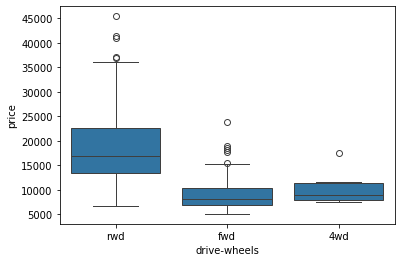

In [29]:
sns.boxplot(x = "drive-wheels", y = "price", data = df)

## Scatter Plors

Text(0, 0.5, 'Price (USD)')

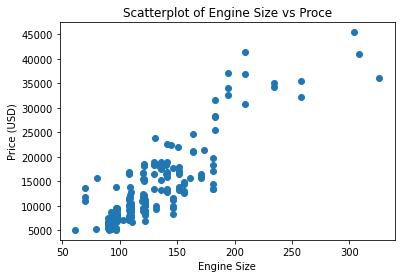

In [30]:
plt.scatter(x = df["engine-size"], y = df["price"])
plt.title("Scatterplot of Engine Size vs Proce")
plt.xlabel("Engine Size")
plt.ylabel("Price (USD)")

## Group by

The `df.groupby()` method is used for this purpose. The argument `as_index = False` will avoid merging cells for the 1st grouping variable.

In [31]:
df_test = df[["drive-wheels", "body-style", "price"]]
df_grp = df_test.groupby(["drive-wheels", "body-style"], as_index = False).mean()
df_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [32]:
df_grp['price']

0      7603.000000
1     12647.333333
2      9095.750000
3     11595.000000
4      8249.000000
5      8396.387755
6      9811.800000
7      9997.333333
8     23949.600000
9     24202.714286
10    14337.777778
11    21711.833333
12    16994.222222
Name: price, dtype: float64

### The `pivot` method

In [33]:
df_pivot = df_grp.pivot(columns = 'body-style', index = 'drive-wheels')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Heatmaps

C:\Users\visne\AppData\Local\Temp\ipykernel_15448\1039962715.py:2: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


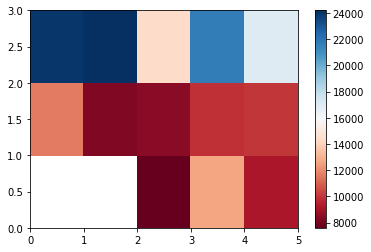

In [34]:
plt.pcolor(df_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

### Summary of plots

| Libraries     | Type of plot                   | Command                                 |
|:--------------|:-------------------------------|:----------------------------------------|
| Pyplot        | Line Plot                      | `plt.plot(x,y)`                         |
|               | Scatter Plot                   | `plt.scatter(x,y)`                      |
|               | Histogram                      | `plt.hist(x,bins)`                      |
|               | Bar Plot                       | `plt.bar(x,height)`                     |
|               | Pseudo Color Plot              | `plt.pcolor(C)`                         |
| Seaborn       | Regression Plot                | `sns.regplot(x, y ,data= df)`           |
|               | Box Plots                      | `sns.boxplot(x, y, data)`               |
|               | Residual Plot M1               | `sns.residplot(data,x, y)`              |
|               | Residual Plot M2               | `sns.residplot(x, y)`                   |
|               | KDE (Kernel Density Estimate)  | `sns.kdeplot(X)`                        |
|               | Distribution plot              | `sns.distplot(X,hist=False)`            |

## Correlation
To check the correlation between *engine size* and *price*, we can start with scatter plot to check if there is a linear relationship.

Text(0, 0.5, 'Price (USD)')

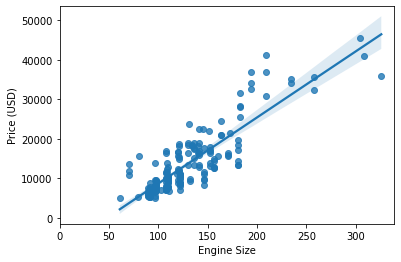

In [35]:
sns.regplot(x = df['engine-size'], y = df['price'])
plt.xlim(0,)
plt.xlabel('Engine Size')
plt.ylabel('Price (USD)')

Text(0, 0.5, 'Price (USD)')

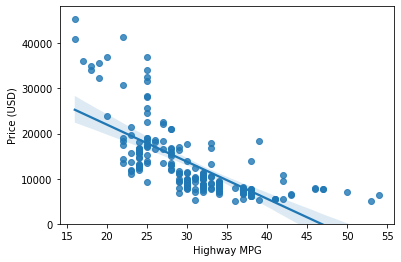

In [36]:
sns.regplot(x = df['highway-mpg'], y = df['price'])
#plt.xlim(0,)
plt.ylim(0,)
plt.xlabel('Highway MPG')
plt.ylabel('Price (USD)')

Text(0, 0.5, 'Price (USD)')

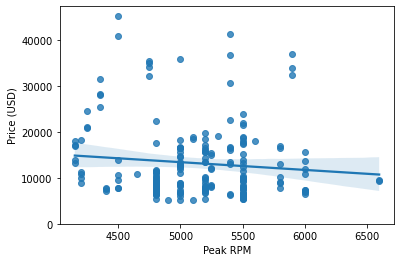

In [37]:
sns.regplot(x = df['peak-rpm'], y = df['price'])
#plt.xlim(0,)
plt.ylim(0,)
plt.xlabel('Peak RPM')
plt.ylabel('Price (USD)')

## Correlation Statistics
Let's discuss the Pearson correlations coefficient and associated p-value.

In [38]:
pear = df[['horsepower','price']].dropna(axis = 0)
# pear.info()
R, p_value = stats.pearsonr(pear['horsepower'], pear['price'])
R, p_value

(0.8105330821322061, 1.189127827694731e-47)

## Lesson Summary
At this point in the course, we know: 
* Tools like the `describe` function in pandas can quickly calculate key statistical measures like **mean**, **standard deviation**, and **quartiles** for all numerical variables in your data frame. 
* Use the `value_counts` function to summarize data into different categories for categorical data. 
* Box plots offer a more visual representation of the data's distribution for numerical data, indicating features like the **median**, **quartiles**, and **outliers**.
* Scatter plots are excellent for exploring relationships between continuous variables, like *engine size* and *price*, in a car data set.
* Use Pandas' `groupby` method to explore relationships between categorical variables.
* Use pivot tables and heat maps for better data visualizations.
* Correlation between variables is a statistical measure that indicates how the changes in one variable might be associated with changes in another variable.
* When exploring correlation, use scatter plots combined with a regression line to visualize relationships between variables.
* Visualization functions like `regplot`, from the seaborn library, are especially useful for exploring correlation.
* The Pearson correlation, a key method for assessing the correlation between continuous numerical variables, provides two critical values — the coefficient, which indicates the strength and direction of the correlation, and the P-value, which assesses the certainty of the correlation.
* A correlation coefficient close to 1 or -1 indicates a strong positive or negative correlation, respectively, while one close to zero suggests no correlation.
* For P-values, values less than .001 indicate strong certainty in the correlation, while larger values indicate less certainty. Both the coefficient and P-value are important for confirming a strong correlation.
* Heatmaps provide a comprehensive visual summary of the strength and direction of correlations among multiple variables.


# Model Development

A **model** is a amthematical equation used to predict one value given one or more values.

## Simple Linear Regression
Let *y* be the **target/dependent variable** and *x* the **predictor/independent variable**, the equation of the model is: $$y = b_0 + b_{1}x$$

where
* $b_0$: is the **intercept**
* $b_1$: is the **slope**

Steps to follow to perform a simple linear regression in Python include:

1. Import `linear_model` from scikit-learn (see cell 2)
1. Create a Linear Regression Object using the constructor
1. Define the predictor variable and the target variable
1. Use `lm.fit(X,Y` to fit he model, i.e. find the parameters $b_0$ and $b_1$
1. We can obtain a prediction

(0.0, 48159.60537295477)

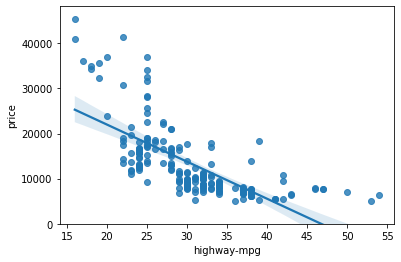

In [39]:
sns.regplot(x = df['highway-mpg'], y = df['price'])
plt.ylim(0,)

In [40]:
Reg = df[['highway-mpg', 'price']]
# Reg.dropna(axis = 0)
Reg = Reg[np.isfinite(Reg).all(1)]

Reg.head()

lm = LinearRegression()
X = Reg[['highway-mpg']] # X must be a 2D array
Y = Reg['price']
lm.fit(X, Y)

LinearRegression()

In [41]:
# View Parameters
Yhat = lm.predict(X)
Yhat

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508, 17879.97140011, 17879.97140011, 17879.97140011,
       21988.63829172, 14593.03788682, 14593.03788682, 15414.77126514,
       15414.77126514, 17879.97140011, 20345.17153508, 20345.17153508,
       21988.63829172, -5128.5631929 ,  3088.77059031,  3088.77059031,
        4732.23734696,  7197.43748192, 13771.3045085 ,  7197.43748192,
        7197.43748192,  7197.43748192, 13771.3045085 , 13771.3045085 ,
       18701.70477843, -5950.29657123,  7197.43748192,  3910.50396864,
       10484.37099521, 10484.37099521, 10484.37099521, 10484.37099521,
       11306.10437353, 11306.10437353, 11306.10437353, 11306.10437353,
       15414.77126514, 12949.57113018, 14593.03788682, 14593.03788682,
       22810.37167004, 22810.37167004, 24453.83842668, 12949.57113018,
        7197.43748192,  7197.43748192,  7197.43748192,  7197.43748192,
       19523.43815675, 19523.43815675, 19523.43815675, 19523.43815675,
      

In [42]:
# b0 & b1
lm.intercept_, lm.coef_

(38423.3058581574, array([-821.73337832]))

The equation becomes: $$Price = 38423.31 - 821.73\times Highway\_mpg$$

## Multiple Linear Regression
The equation is $$\hat{Y} = b_0 + b_1X_1 + b_2X_2+b_3X_3 + ... + b_nX_n$$

It takes the following steps:

1. Extract predictor vairables and store in a variable Z
1. Treain the model as before

In [43]:
df2 = df[['price', 'horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
df3 = df2[np.isfinite(df2).all(1)]

z = df3[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y2 = df3['price']
lmm = LinearRegression()

lmm.fit(z, Y2)

LinearRegression()

In [44]:
Yhat2 = lmm.predict(z)

In [45]:
lmm.intercept_

-15700.5739790393

In [46]:
lmm.coef_

array([53.27878556,  4.66217408, 82.22948394, 35.5175845 ])

The equation becomes $$\hat{Price} = -15700.57 + 53.28 \times Horsepower + 4.66 \times curb\_weight + 82.23 \times engine\_size + 35.52 \times highway\_mpg$$

## Model Evaluation using Visualization

Here, we have:
1. Regression plot (Seaborn)
2. The residual plot
3. Distribution plot (distplot is deprecated, use displot or kdeplot)

<Axes: xlabel='highway-mpg', ylabel='price'>

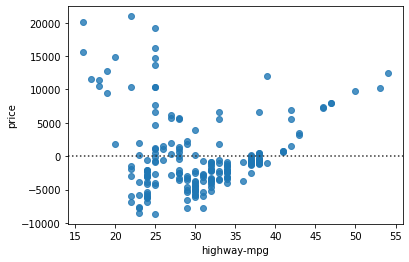

In [47]:
sns.residplot(x = X, y = Y)

<Axes: xlabel='price', ylabel='Density'>

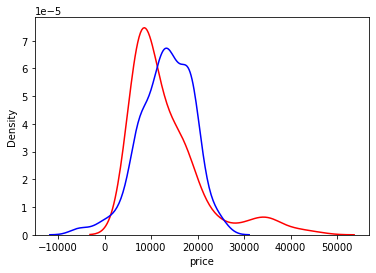

In [48]:
ax1 = sns.kdeplot(Reg['price'], color = "r", label = "Actual Values")
sns.kdeplot(Yhat, color = "b", label = "Fitted Values", ax = ax1)

<Axes: xlabel='price', ylabel='Density'>

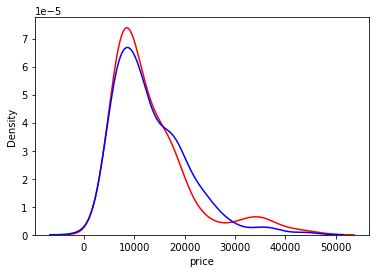

In [49]:
ax1 = sns.kdeplot(df3['price'], color = "r", label = "Actual Values")
sns.kdeplot(Yhat2, color = "b", label = "Fitted Values", ax = ax1)

## Polynomial Regression and Pipelines
When the linear regression is not the best fit for our data, a polynomial regression can be considered. Here, the data is transformed into a polynomial and the linear regression is used to fit the parameters.

Pipelines are ways to simplify the code.

Polynomial reg is a case of general linear reg model, and is best to describe curvilinear relationships. The model can be:
* Quadratic - 2nd order polynomial regression where the equation is: $$\hat{Y} = b_0 + b_1X_1 + b_2(X_1)^2$$
* Cubic - 3rd order polynomial regression where the equation is: $$\hat{Y} = b_0 + b_1X_1 + b_2(X_1)^2 + b_3(X_1)^3$$
* Higher order polynomial regression where the equation is: $$\hat{Y} = b_0 + b_1X_1 + b_2(X_1)^2 + b_3(X_1)^3 + ...$$

### Example in Python
#### Polynomial Regression with one dimension
Calculate Polynomial of 3rd order


In [50]:
f = np.polyfit(Reg['price'], Y, 3)
p = np.poly1d(f)
p

poly1d([ 7.40516833e-25, -2.75757396e-20,  1.00000000e+00,  0.00000000e+00])

#### Polynomial Regression with one dimension Calculate Polynomial of 3rd order
`np` cannot deal with this. `preprocessing` lib in scikit-learn will be used
Here, the equation is in the format $$\hat{Y} = b_0 + b_1X_1 + b_2X_2 + b_3X_1X_2 + b_4(X_1)^2 + b_5(X_2)^2 + ...$$

In [51]:
Scale = StandardScaler()
Scale.fit(df3[['horsepower', 'curb-weight']])
x_scale = Scale.transform(df3[['horsepower', 'curb-weight']])

### Pipelines
For pipelines, 
1. we'll import all the modules we need (`PolynomialFeature`, `LinearRegression`, and `StandardScaler`) and the library `Pipeline`
2. Create a list of tuples where the 1st element is the name of the estimator, and the 2nd contains model constructor.
3. Put the list in the pipeline constructor to create a pipeline object
4. The pipeline can be trained

In [52]:
Input = [('polynomial', PolynomialFeatures(degree = 2)),
         ('scale', StandardScaler()),
         ('Model', LinearRegression())]

pipe = Pipeline(Input)

pipe.fit(z, Y2)

Yhat3 = pipe.predict(z)

<Axes: xlabel='price', ylabel='Density'>

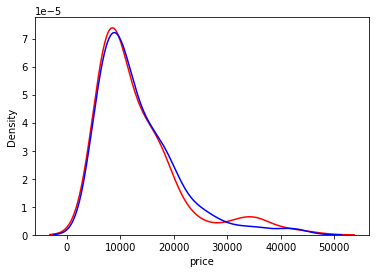

In [53]:
ax1 = sns.kdeplot(df3['price'], color = "r", label = "Actual Values")
sns.kdeplot(Yhat3, color = "b", label = "Fitted Values", ax = ax1)

## Measures for In-Sample Evaluation
* A way to numerically determine how good the model fits on data
* Two important measures to determine the fit of a model:
    - Mean Squared Erro (MSE)
    - R-Squared ($R^2$) AKA the coefficient of determination (score)
    $$R^2 = 1 - \frac{MSE\ of\ Reg\ Line}{MSE\ of\ the\ AVG\ of\ the\ Data}$$
    
To measure the MSE in python, the module `mean_squared_error` from `sklearn.metrics` is used.

$R^2$ is generally between 0 and 1. If it's less than 0, it's a sign of overfitting. For interpretation of $R^2$, see **Falk & Miller (1992)**.

In [56]:
mean_squared_error(df3['price'], Yhat3)

9697923.625397738

In [57]:
lm.score(X, Y)

0.4965911884339176

## Prediction and Decison Making
To determine the final bast fit, we look at a combination of:
* Do the predicted values make sense?
* Viz
* Numerical measures for evaluation
* Comparing models

Note that the `seq()` dunction is R is implement in Python with `np.arange(from, to, by)`

### Comparing MLR and SLR
1. A lower MSE does not always imply a better fit.
1. MSE for an MLR model will always be smaller than the MSE for a SLR model since the errors of the adta will decrease when more variables are included in the model.
1. Polynomial regression will also have a smaller MSE than regular regression.
1. A similar inverse relationship holds for $R^2$.


## Lesson Summary
At this point in the course, we know: 
* Linear regression refers to using one independent variable to make a prediction.
* You can use multiple linear regression to explain the relationship between one continuous target y variable and two or more predictor x variables.
* Simple linear regression, or SLR, is a method used to understand the relationship between two variables, the predictor independent variable x and the target dependent variable y.
* Use the `regplot` and `residplot` functions in the `Seaborn library` to create regression and residual plots, which help you identify the strength, direction, and linearity of the relationship between your independent and dependent variables.
* When using residual plots for model evaluation, residuals should ideally have zero mean, appear evenly distributed around the x-axis, and have consistent variance. If these conditions are not met, consider adjusting your model.
* Use distribution plots for models with multiple features: Learn to construct distribution plots to compare predicted and actual values, particularly when your model includes more than one independent variable. Know that this can offer deeper insights into the accuracy of your model across different ranges of values.
* The order of the polynomials affects the fit of the model to your data. Apply Python's `polyfit` function to develop polynomial regression models that suit your specific dataset.
* To prepare your data for more accurate modeling, use feature transformation techniques, particularly using the `preprocessing` library in `scikit-learn`, transform your data using `polynomial features`, and use the modules like `StandardScaler` to normalize the data.
* Pipelines allow you to simplify how you perform transformations and predictions sequentially, and you can use pipelines in `scikit-learn` to streamline your modeling process.
* You can construct and train a pipeline to automate tasks such as normalization, polynomial transformation, and making predictions.
* To determine the fit of your model, you can perform sample evaluations by using the **Mean Square Error (MSE)**, using Python’s `mean_squared_error` function from `scikit-learn`, and using the score method to obtain the `R-squared` value.
* A model with a high `R-squared` value close to 1 and a low `MSE` is generally a good fit, whereas a model with a low `R-squared` and a high `MSE` may not be useful.
* Be alert to situations where your `R-squared` value might be negative, which can indicate **overfitting**. 
* When evaluating models, use visualization and numerical measures and compare different models.
* The mean square error is perhaps the most intuitive numerical measure for determining whether a model is good.
* A distribution plot is a suitable method for multiple linear regression.
* An acceptable `r-squared` value depends on what you are studying and your use case.
* To evaluate your model’s fit, apply visualization, methods like regression and residual plots, and numerical measures such as the model's coefficients for sensibility: 
* Use Mean Square Error (`MSE`) to measure the average of the squares of the errors between actual and predicted values and examine `R-squared` to understand the proportion of the variance in the dependent variable that is predictable from the independent variables.
* When analyzing residual plots, residuals should be randomly distributed around zero for a good model. In contrast, a residual plot curve or inaccuracies in certain ranges suggest non-linear behavior or the need for more data.

<h1><b>Model Evaluation and Refinement</b></h1>

* In-sample evaluation tells how well the model will fit the data used to train it. It does not tell how well the trained model can be used to predict new data
* The solution is to split the data into two parts: I-sample data or training data (the larger part ~70%) and out-of-sample evaluation or test set/testing data (Smaller part ~30%)
* When the testing is completed, all the data should be used to train the model to get the best performance.

To carry-out this technique, the function `train_test_split` from `sklearn.model_selection` is used.

* Generalization error is a measure of how well the data does at predicting previously unseen data
* The error we obtain using our testing data is an approximation of this error

In [60]:
x_train, x_test, y_train, y_test = train_test_split(z, Y2, test_size = .3, random_state = 0)

<h2><b>Cross Validation</b></h2>
* One of the most common out-of-sample evaluation metrics
* More effective use of data (each observation is used for both training and testing)

An evaluation matrics that can be used is $R^2$, calculated using the function `cross_val_score()` from `sklearn.model_selection` which perform multiple our-of-sample validation

In [68]:
# cv sets the number of partitions
scores = cross_val_score(lmm, z, Y2, cv = 3)
print(scores), np.mean(scores)

[0.78952607 0.74392426 0.54069997]


(None, 0.6913834309135737)

The function `cross_val_predict()` returns the prediction that was returned for each element when it was in the test set

In [73]:
Yhat4 = cross_val_predict(lmm, z, Y2, cv = 3)
print(Yhat4)

[12827.47262967 12827.47262967 18183.75643728  9637.90934399
 14204.7597532  13061.68705776 14357.97461852 14781.09518731
 15644.78176848  9601.85897259  9601.85897259 17694.4938675
 17906.05415189 18709.31377517 26803.44290734 27380.42550115
 27653.0842906   1039.50702321  5650.17504454  5784.80431643
  5355.32562495  5043.08556686  7647.3107435   5393.12167377
  5477.74578753  5477.74578753  7889.6434329  11141.2766073
 17936.23281055  5825.22380868  5417.12020417  3745.1907217
  5466.23275239  5527.7775624   5735.49129617  5789.34300493
  8914.46697926  9118.3341624   9176.03242179  9437.59786431
  9982.79559151  9586.23770097  8616.99763377 11573.40550275
 34709.84504112 34709.84504112 45449.70707389  4476.25618732
  5243.28182912  5262.51458225  5416.37660727  5435.60936039
  4820.27680143  4820.27680143  4839.50955456  7965.15554493
 10583.689088   10679.85285363 10583.689088   10679.85285363
 10903.76439677 10737.55111301 14800.263448   13252.16634489
 22622.81144276 23526.75083

## Overfitting, Underfitting, and Model Selection
**Underfitting** is when the model is too simple to fit the data like in the figure below

![Underfitting](Illustration/underfit.png)

On the other hand, **Overfitting** is when the model is too flexible and fits the noise rather than the function.

![Underfitting](Illustration/overfit.png)

$R^2$ can be used to determine which order of polynomial regression would fit the data better.

In [75]:
Rsqu_test = []
order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    
    lmm.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lmm.score(x_test_pr, y_test))

In [77]:
print(Rsqu_test)

[0.6744455628629881, 0.6764473389271954, 0.6812379920245005, 0.6862312998249094]


# Introduction to Ridge Regression
For models with multiple independent features and ones with polynomial feature extrapolation, it is common to have colinear combinations of features. Left unchecked, this multicollinearity of features can lead the model to overfit the training data. To control this, the feature sets are typically regularized using hyperparameters.

Ridge regression is the process of regularizing the feature set using the hyperparameter alpha. The upcoming video shows how Ridge regression can be utilized to regularize and reduce standard errors and avoid over-fitting while using a regression model.

A low value of alpha can lead to overfitting, while a high aplha will lead to underfitting. To select an optimal alpha, we can use cross validation. The module `Ridge()` from `sklern.linear_model` is necessary.

In [81]:
RidgeModel = Ridge(alpha = .1)
RidgeModel.fit(z, Y2)
Yhat4 = RidgeModel.predict(z)

In [82]:
Yhat4

array([13741.40310989, 13741.40310989, 19088.01131102, 10657.90694623,
       15557.0725999 , 13919.32085811, 15490.4708376 , 16003.30910983,
       17628.34537646, 10757.28853225, 10757.28853225, 17860.77913969,
       18117.1982758 , 19362.67859229, 27022.33155784, 27721.65647453,
       28233.39533459,   692.53465127,  5693.7559333 ,  5856.93174719,
        5525.49118555,  5418.94332978,  8778.98963605,  5843.2004459 ,
        5945.76810035,  5945.76810035,  9072.70610106, 11904.09921324,
       18810.44415509,  4858.93862073,  5743.88758282,  4048.42936172,
        6165.94587458,  6240.54053236,  6492.29750236,  6557.56782792,
        9523.34812425,  9770.44292815,  9840.37541982, 10157.40271538,
       11212.58322501, 10463.95992159,  9508.16389776, 12656.22296823,
       34522.92895667, 34522.92895667, 44084.65093161,  5317.83150031,
        5613.0648249 ,  5636.37565545,  5822.8622999 ,  5846.17313046,
        7349.539008  ,  7349.539008  ,  7372.84983855, 10542.76601988,
      

## Grid Search
Grid Search allows to scan through multiple free parameters with few lines of code.

Alpha in Ridge regression is called a hyperparameter

scikit-learn has a means to automatically iterating ove these hyperparameters using cross-validation called Grid Search

In [85]:
parameters1 = [{'alpha': [.001,.1,1,10,100,1000,10000,100000,1000000]}]

RR = Ridge()

Grid1 = GridSearchCV(RR, parameters1, cv = 4)

Grid1.fit(z, Y2)

Grid1.best_estimator_

Ridge(alpha=10000)

In [88]:
scores = Grid1.cv_results_
scores['mean_test_score']

array([0.64703019, 0.64703064, 0.64703477, 0.6470758 , 0.64746007,
       0.64975482, 0.65246626, 0.64186174, 0.61255388])

## Lesson Summary
At this point in the course, we know: 
* How to split your data using the `train_test_split()` method into training and test sets. You use the training set to train a model, discover possible predictive relationships, and then use the test set to test your model to evaluate its performance.
* How to use the generalization error to measure how well your data does at predicting previously unseen data.
* How to use cross-validation by splitting the data into folds where you use some of the folds as a training set, which we use to train the model, and the remaining parts are used as a test set, which we use to test the model. You iterate through the folds until you use each partition for training and testing. At the end, you average results as the estimate of out-of-sample error.
* How to pick the best polynomial order and problems that arise when selecting the wrong order polynomial by analyzing models that underfit and overfit your data.
* Select the best order of a polynomial to fit your data by minimizing the test error using a graph comparing the mean square error to the order of the fitted polynomials.
* You should use ridge regression when there is a strong relationship among the independent variables.  
* That ridge regression prevents overfitting.
* Ridge regression controls the magnitude of polynomial coefficients by introducing a hyperparameter, alpha. 
* To determine alpha, you divide your data into training  and validation data. Starting with a small value for alpha, you train the model, make a prediction using the validation data, then calculate the R-squared and store the vaues. You repeat the value for a larger value of alpha. You repeat the process for different alpha values, training the model, and making a prediction. You select the value of alpha that maximizes R-squared.
* That grid search allows you to scan through multiple hyperparameters using the `Scikit-learn` library, which iterates over these parameters using cross-validation. Based on the results of the grid search method, you select optimum hyperparameter values.
* The `GridSearchCV()` method takes in a dictionary as its argument where the key is the name of the hyperparameter, and the values are the hyperparameter values you wish to iterate over.